In [1]:
from keras.applications import VGG16

Using TensorFlow backend.


In [2]:
conv_base = VGG16(weights = 'imagenet',
                 include_top = False,
                 input_shape=(150,150,3))

In [3]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
%matplotlib inline
import os
import numpy as np

In [4]:
base_dir = './datasets/cats_and_dogs_small'

train_dir = os.path.join(base_dir,'train')

validation_dir = os.path.join(base_dir,'validation')

test_dir = os.path.join(base_dir,'test')

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.


In [7]:
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 1000 images belonging to 2 classes.


In [17]:
from keras import layers
from keras import models


model = models.Sequential()
model.add(conv_base)

model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [18]:
from keras import optimizers


conv_base.trainable = False
model.compile(loss='binary_crossentropy',
        optimizer=optimizers.RMSprop(lr=2e-5),
        metrics=['acc'])


In [19]:
print(len(model.trainable_weights))

4


In [20]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50,
    verbose=2
)

Epoch 1/30
 - 174s - loss: 0.5987 - acc: 0.6810 - val_loss: 0.4878 - val_acc: 0.8190
Epoch 2/30
 - 187s - loss: 0.4888 - acc: 0.7740 - val_loss: 0.3462 - val_acc: 0.8570
Epoch 3/30
 - 189s - loss: 0.4352 - acc: 0.8080 - val_loss: 0.5085 - val_acc: 0.8720
Epoch 4/30
 - 193s - loss: 0.4064 - acc: 0.8160 - val_loss: 0.2101 - val_acc: 0.8680
Epoch 5/30
 - 197s - loss: 0.3880 - acc: 0.8275 - val_loss: 0.3700 - val_acc: 0.8750
Epoch 6/30
 - 198s - loss: 0.3690 - acc: 0.8385 - val_loss: 0.1807 - val_acc: 0.8890
Epoch 7/30
 - 215s - loss: 0.3621 - acc: 0.8330 - val_loss: 0.3746 - val_acc: 0.8880
Epoch 8/30
 - 198s - loss: 0.3705 - acc: 0.8295 - val_loss: 0.2552 - val_acc: 0.8900
Epoch 9/30
 - 200s - loss: 0.3473 - acc: 0.8470 - val_loss: 0.2879 - val_acc: 0.8920
Epoch 10/30
 - 203s - loss: 0.3296 - acc: 0.8545 - val_loss: 0.3069 - val_acc: 0.8940
Epoch 11/30
 - 210s - loss: 0.3343 - acc: 0.8570 - val_loss: 0.3862 - val_acc: 0.8940
Epoch 12/30
 - 171s - loss: 0.3278 - acc: 0.8535 - val_loss: 0.

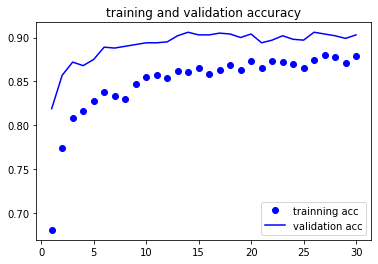

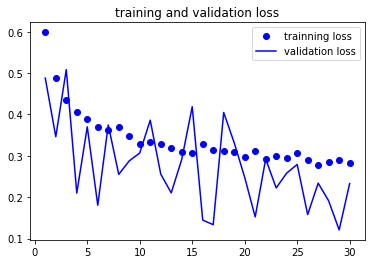

In [21]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='trainning acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='trainning loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.legend()

plt.show()